<a href="https://colab.research.google.com/github/karank85/speech-recognition/blob/main/Project_2_Non_DL_Speech_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import os

import numpy as np
from numpy import ndarray
import pandas as pd

import librosa

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
from tqdm import tqdm

import glob

In [53]:
librosa.__version__

'0.10.1'

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Assumptions:
# - The transcription file is located in the same directory as the audio files.
class AudioDataset:
  """
  Class for loading and storing audio data.
  """

  def __init__(self):
    self.df = pd.DataFrame(columns=['id', 'path', 'transcription'])

  def load_transcriptions(self, directory_path: str) -> bool:
    """
    Load all transcriptions from a given directory, including subdirectories.
    Returns False if no transcription files were found, or if any failed to load.
    """
    transcriptions_path = glob.glob(
        f"{directory_path}/**/*.trans.txt",
        recursive=True
    )

    if len(transcriptions_path) == 0:
      return False

    for path in transcriptions_path:
      if not self.load_transcription_file(path):
        return False

    return True



  def load_transcription_file(self, file_path: str) -> bool:
    """
    Parse transcription file and records the audio ID - subtitle mapping.
    Returns False if the file could not be read.
    """
    with open(file_path, "r") as file:
      file_directory = os.path.dirname(file_path)

      lines = file.read().split("\n")
      for line in lines:
        if len(line.strip()) == 0:
          continue
        splitter = line.split(" ")
        file_name = splitter[0]
        file_content = ' '.join(splitter[1:])
        self.df.loc[len(self.df)] = {
            'id':file_name,
            'transcription':file_content,
            'path': f'{file_directory}/{file_name}.flac'
        }
      return True
    return False

  def keys(self):
    return iter(self.df['id'])

  def get(self, id: int):
    """
    Retrieve a dataframe row from ID.
    """
    return self.df.loc[self.df['id'] == id]

In [56]:
ds = AudioDataset()

In [57]:
ds.load_transcriptions("/content/drive/MyDrive/datasets")

True

### Extracting Features

In [58]:
from librosa.feature import mfcc
import librosa
audio, sampling_freq = librosa.load(ds.df.head()['path'].values[0])
mfcc_features = librosa.feature.mfcc(sr=sampling_freq, y=audio)
print('\nNumber of windows =', mfcc_features.shape[0])
print('Length of each feature =', mfcc_features.shape[1])


Number of windows = 20
Length of each feature = 85


Text(0.5, 1.0, 'MFCC')

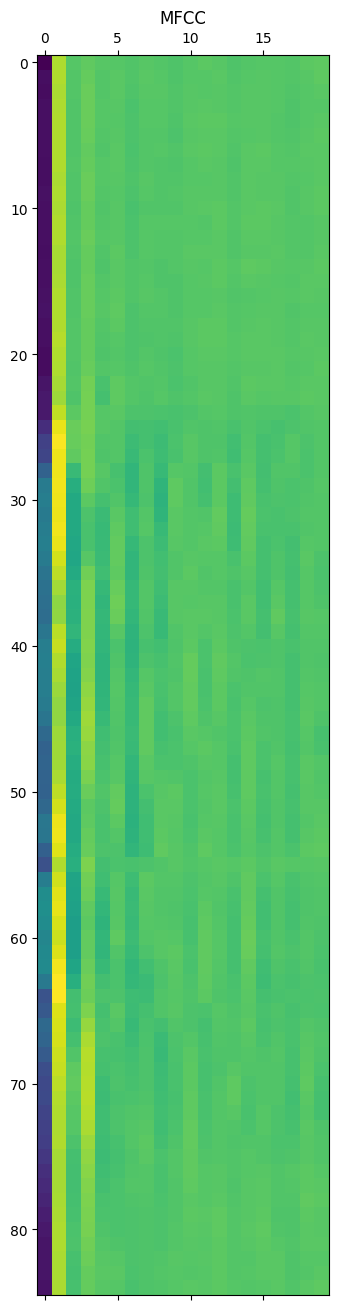

In [59]:
mfcc_features = mfcc_features.T
plt.matshow(mfcc_features)
plt.title('MFCC')

In [60]:
!pip install hmmlearn
!pip install features

In [61]:
import os
import numpy as np
from scipy.io import wavfile
from hmmlearn import hmm #importing GaussianHMM
import librosa # reading wavefilesfrom librosa.feature import mfcc #to extract mfcc features

In [62]:
class HMMTrainer(object):
  def __init__(self, model_name='GaussianHMM', n_components=4):
     self.model_name = model_name
     self.n_components = n_components

     self.models = []
     if self.model_name == 'GaussianHMM':
        self.model=hmm.GaussianHMM(n_components=4)
     else:
        print("Please choose GaussianHMM")

  def train(self, X):
      self.models.append(self.model.fit(X))

  def get_score(self, input_data):
      return self.model.score(input_data)

In [63]:
ds.df

,id,path,transcription
0,19-198-0000,/content/drive/MyDrive/datasets/19-198-0000.flac,NORTHANGER ABBEY
1,19-198-0001,/content/drive/MyDrive/datasets/19-198-0001.flac,THIS LITTLE WORK WAS FINISHED IN THE YEAR EIGH...
2,19-198-0002,/content/drive/MyDrive/datasets/19-198-0002.flac,NEITHER THE AUTHOR NOR THE PUBLIC HAVE ANY OTH...
3,19-198-0003,/content/drive/MyDrive/datasets/19-198-0003.flac,THE PUBLIC ARE ENTREATED TO BEAR IN MIND THAT ...
4,19-198-0004,/content/drive/MyDrive/datasets/19-198-0004.flac,CHAPTER ONE NO ONE WHO HAD EVER SEEN CATHERINE...
5,19-198-0005,/content/drive/MyDrive/datasets/19-198-0005.flac,THE CHARACTER OF HER FATHER AND MOTHER HER OWN...
6,19-198-0006,/content/drive/MyDrive/datasets/19-198-0006.flac,HER MOTHER WAS A WOMAN OF USEFUL PLAIN SENSE W...
7,19-198-0007,/content/drive/MyDrive/datasets/19-198-0007.flac,WHERE THERE ARE HEADS AND ARMS AND LEGS ENOUGH...
8,19-198-0008,/content/drive/MyDrive/datasets/19-198-0008.flac,SHE HAD A THIN AWKWARD FIGURE
9,19-198-0009,/content/drive/MyDrive/datasets/19-198-0009.flac,DARK LANK HAIR AND STRONG FEATURES SO MUCH FOR...


In [64]:
hmm_models = []
X = np.array([])
y_words = []
label = []
for index, row in ds.df.iterrows():
   # Read the input file
   audio, sampling_freq = librosa.load(row['path'])
   # Extract MFCC features
   mfcc_features = librosa.feature.mfcc(sr=sampling_freq, y=audio)
   # Append to the variable X
   if len(X) == 0:
     X = mfcc_features[:,:15]
   else:
     X = np.append(X, mfcc_features[:,:15], axis=0)
   # Append the label
   y_words.append(row['transcription'])
   print('X.shape =', X.shape)

X.shape = (20, 15)
X.shape = (40, 15)
X.shape = (60, 15)
X.shape = (80, 15)
X.shape = (100, 15)
X.shape = (120, 15)
X.shape = (140, 15)
X.shape = (160, 15)
X.shape = (180, 15)
X.shape = (200, 15)
X.shape = (220, 15)
X.shape = (240, 15)
X.shape = (260, 15)
X.shape = (280, 15)
X.shape = (300, 15)
X.shape = (320, 15)
X.shape = (340, 15)
X.shape = (360, 15)
X.shape = (380, 15)
X.shape = (400, 15)
X.shape = (420, 15)
X.shape = (440, 15)
X.shape = (460, 15)
X.shape = (480, 15)
X.shape = (500, 15)
X.shape = (520, 15)
X.shape = (540, 15)
X.shape = (560, 15)
X.shape = (580, 15)
X.shape = (600, 15)
X.shape = (620, 15)
X.shape = (640, 15)
X.shape = (660, 15)
X.shape = (680, 15)
X.shape = (700, 15)
X.shape = (720, 15)
X.shape = (740, 15)
X.shape = (760, 15)


In [65]:
hmm_trainer = HMMTrainer()
hmm_trainer.train(X)
hmm_models.append((hmm_trainer, y_words))
hmm_trainer = None

In [66]:
scores=[]
for item in hmm_models:
  hmm_model, label = item
  score = hmm_model.get_score(mfcc_features)
  scores.append(score)
  index=np.array(scores).argmax()
  # Print the output
  print("\nTrue:", input_file[input_file.find('/')+1:input_file.rfind('/')])
  print("Predicted:", hmm_models[index][1])

ValueError: operands could not be broadcast together with shapes (20,1,183) (4,15) 

In [68]:
hmm_models = []
X = np.array([])
y_words = []
label = []
for index, row in ds.df.iterrows():
   # Read the input file
   audio, sampling_freq = librosa.load(row['path'])
   # Extract MFCC features
   mfcc_features = librosa.feature.mfcc(sr=sampling_freq, y=audio)
   # Append to the variable X
   if len(X) == 0:
     X = mfcc_features[:, :1]  # 15 here denotes the number of MFCC coefficients to consider
   else:
     X = np.append(X, mfcc_features[:, :1], axis=0)
   # Append the label
   y_words.append(row['transcription'])
   print('X.shape =', X.shape)

   # Train HMM model for this iteration
   hmm_trainer = HMMTrainer()
   hmm_trainer.train(X)  # Train using the current MFCC features
   hmm_models.append((hmm_trainer, row['transcription']))

scores = []
for hmm_model, _ in hmm_models:
    score = hmm_model.get_score(X)
    scores.append(score)

index = np.array(scores).argmax()
# Print the output
print("\nTrue:", y_words[index])
print("Predicted:", hmm_models[index][1])


X.shape = (20, 1)
X.shape = (40, 1)
X.shape = (60, 1)
X.shape = (80, 1)
X.shape = (100, 1)
X.shape = (120, 1)
X.shape = (140, 1)
X.shape = (160, 1)
X.shape = (180, 1)
X.shape = (200, 1)
X.shape = (220, 1)
X.shape = (240, 1)
X.shape = (260, 1)
X.shape = (280, 1)
X.shape = (300, 1)
X.shape = (320, 1)
X.shape = (340, 1)
X.shape = (360, 1)
X.shape = (380, 1)
X.shape = (400, 1)
X.shape = (420, 1)
X.shape = (440, 1)
X.shape = (460, 1)
X.shape = (480, 1)
X.shape = (500, 1)
X.shape = (520, 1)
X.shape = (540, 1)
X.shape = (560, 1)
X.shape = (580, 1)
X.shape = (600, 1)
X.shape = (620, 1)
X.shape = (640, 1)
X.shape = (660, 1)
X.shape = (680, 1)
X.shape = (700, 1)
X.shape = (720, 1)
X.shape = (740, 1)
X.shape = (760, 1)

True: AND RUNNING ABOUT THE COUNTRY AT THE AGE OF FOURTEEN TO BOOKS OR AT LEAST BOOKS OF INFORMATION FOR PROVIDED THAT NOTHING LIKE USEFUL KNOWLEDGE COULD BE GAINED FROM THEM PROVIDED THEY WERE ALL STORY AND NO REFLECTION
Predicted: AND RUNNING ABOUT THE COUNTRY AT THE AGE OF FOUR